In [1]:
%matplotlib inline
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Lib.BEM_Solver.BEM_2D import *
from Lib.Domain_Decomposition.Coupling_Main import *

[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:20 E-T(20,0)
[Mesh] Number of Nodes:60 E-T(60-0)
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(3, 100)]
[Boundary Condition] Neumann BC @ [(1, -50)]


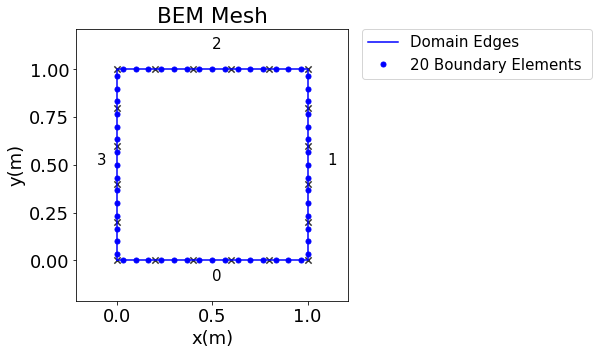

In [56]:
BEM_Case1=BEM2D()

#1.Build Mesh-#Anti-clock wise for internal domain
Boundary_vert=[(0.0, 0.0), (1.0, 0.0),(1.0,1.0),(0.0,1.0)]  #bottom
element_esize=0.2

BEM_Case1.set_Mesh(Boundary_vert,[],element_esize,[],Type="Quad")

#2.Set Boundary condition
bc0=[(3,100)]
bc1=[(1,-50)]
BEM_Case1.set_BoundaryCondition(DirichletBC=bc0,NeumannBC=bc1)#,RobinBC=bc1)

#3.Set Domain Properties - permeability tensor
k11=5
k12=2
k22=1
k_tensor=[k11,k12,k22]
BEM_Case1.SetProps(k_tensor)

#Check Mesh
BEM_Case1.plot_Mesh()
#Check Node,BC if necessary
#BEM_Case1.Mesh.print_debug()

[Visulization] Plotting Solution


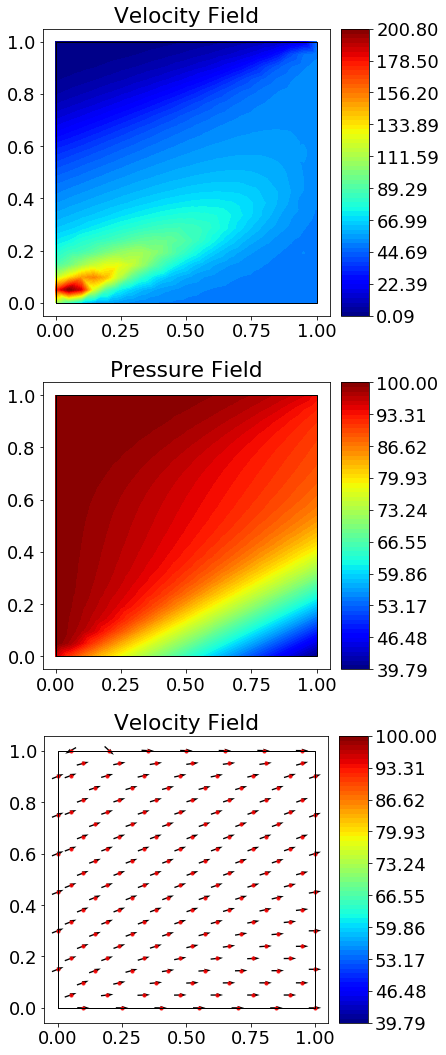

In [57]:
puv=BEM_Case1.Solve()
xx=BEM_Case1.PostProcess.plot_Solution()
#BEM_Case1.PostProcess.print_Solution()

In [58]:
BEM_Case1.get_Solution((0.5001,0.0))

(64.68742468941956, 50.232024216047584, -0.050213966970484816)

In [59]:
BEM_Case1.get_Solution((0.0,0.05))

(100.0, 159.89985534174258, 60.31761285157336)

In [60]:
np.array(Field_Solve(0.01,0.98,BEM_Case1.BEs_edge,BEM_Case1.Mesh))

array([ 1.00001261e+02, -1.84103147e-01, -9.87285171e-02])

## Solution Verification

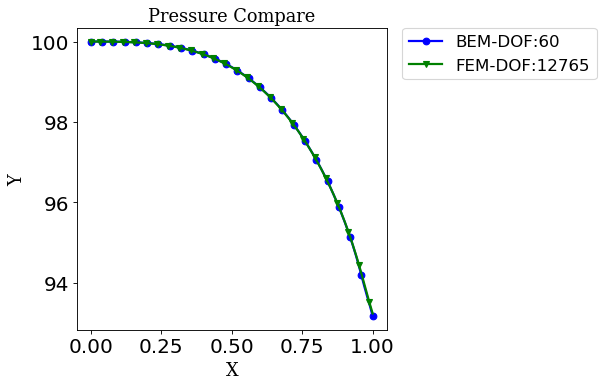

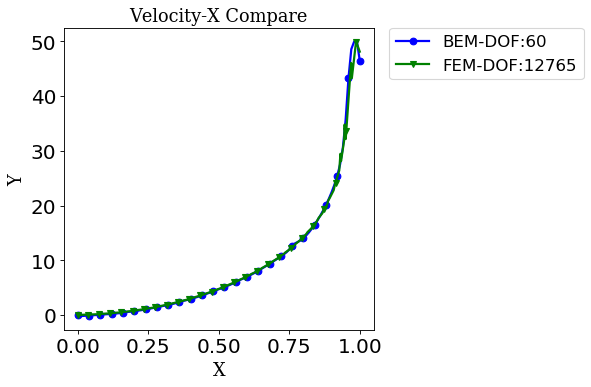

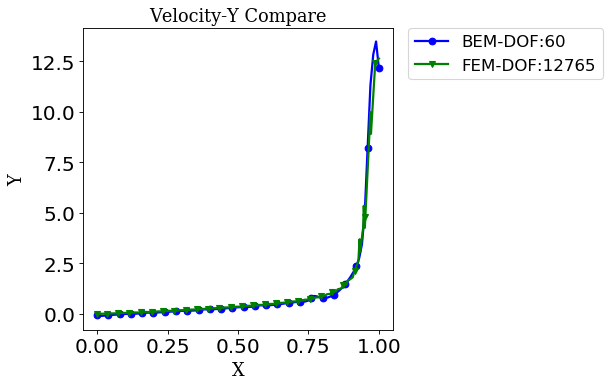

In [61]:
Pts1,Pts2=(0.0,0.98),(1.0,0.98)

#BEM Solution
X0,PUV=BEM_Case1.PostProcess.plot_Solution_overline(Pts1,Pts2,plot=False)
#Get Comsol Data
P = np.genfromtxt('.\Verification\SimpleDomain_p.csv', comments='%',delimiter=',')
U = np.genfromtxt('.\Verification\SimpleDomain_u.csv', comments='%',delimiter=',')
V = np.genfromtxt('.\Verification\SimpleDomain_v.csv', comments='%',delimiter=',')

#Compare Pressure
DataNames=['BEM-DOF:60','FEM-DOF:12765']
DataSetX=[X0,P[:,0]]

DataSetY=[PUV[:,0],P[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Pressure Compare')

DataSetY=[PUV[:,1],U[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-X Compare')

DataSetY=[PUV[:,2],V[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-Y Compare')

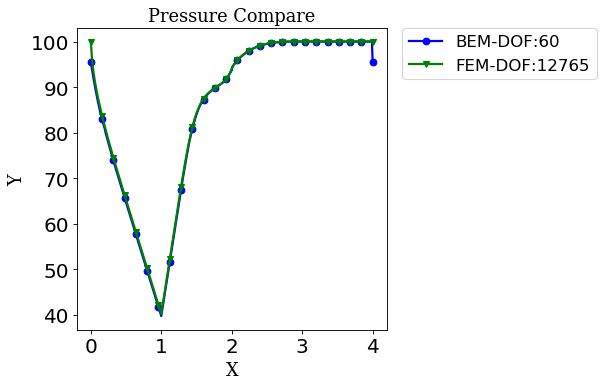

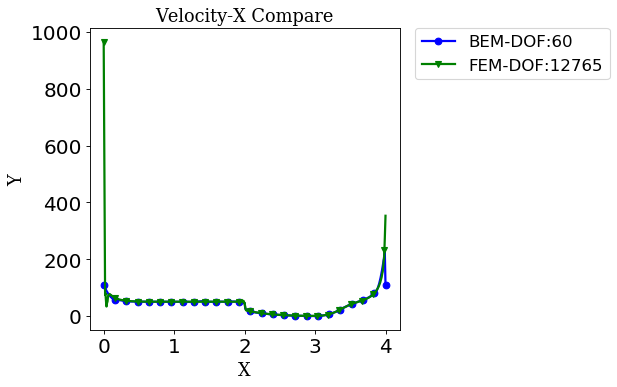

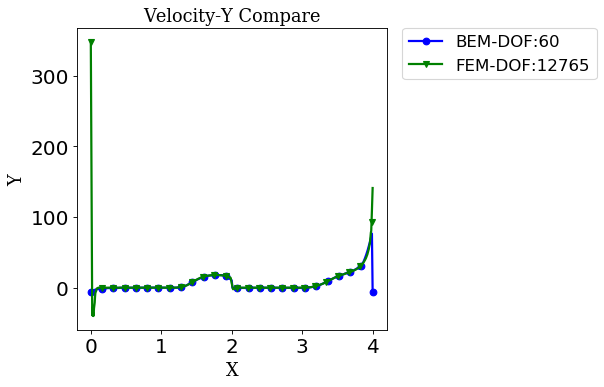

In [62]:
#BEM Solution
X1,PUV=BEM_Case1.PostProcess.plot_SolutionBD(plot=False)
#Get Comsol Data
P = np.genfromtxt('.\Verification\SimpleDomain_BD_p.csv', comments='%',delimiter=',')
U = np.genfromtxt('.\Verification\SimpleDomain_BD_u.csv', comments='%',delimiter=',')
V = np.genfromtxt('.\Verification\SimpleDomain_BD_v.csv', comments='%',delimiter=',')

#Compare Pressure
DataNames=['BEM-DOF:60','FEM-DOF:12765']

DataSetX=[X1,P[:,0]]
DataSetY=[PUV[:,0],P[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Pressure Compare')

DataSetX=[X1,U[:,0]]
DataSetY=[PUV[:,1],U[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-X Compare')

DataSetX=[X1,V[:,0]]
DataSetY=[PUV[:,2],V[:,1]]
BEM_Case1.PostProcess.Compare_LinePlots(DataSetX,DataSetY,DataNames,'Velocity-Y Compare')